<a href="https://colab.research.google.com/github/mohammedameen2020-Civil/Mohammed-Ameen/blob/master/new_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip /content/111880_269359_upload_seg_pred.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_pred/17062.jpg      
  inflating: seg_pred/17068.jpg      
  inflating: seg_pred/17071.jpg      
  inflating: seg_pred/17079.jpg      
  inflating: seg_pred/1708.jpg       
  inflating: seg_pred/17080.jpg      
  inflating: seg_pred/17082.jpg      
  inflating: seg_pred/17083.jpg      
  inflating: seg_pred/17084.jpg      
  inflating: seg_pred/17086.jpg      
  inflating: seg_pred/17088.jpg      
  inflating: seg_pred/17090.jpg      
  inflating: seg_pred/171.jpg        
  inflating: seg_pred/17100.jpg      
  inflating: seg_pred/17103.jpg      
  inflating: seg_pred/17108.jpg      
  inflating: seg_pred/17109.jpg      
  inflating: seg_pred/17115.jpg      
  inflating: seg_pred/17116.jpg      
  inflating: seg_pred/17118.jpg      
  inflating: seg_pred/1712.jpg       
  inflating: seg_pred/17121.jpg      
  inflating: seg_pred/17125.jpg      
  inflating: seg_pred/17127.jpg      
  inflating: seg_pred/17128.jpg      

In [5]:
!unzip /content/111880_269359_upload_seg_test.zip

Archive:  /content/111880_269359_upload_seg_test.zip
   creating: seg_test/buildings/
  inflating: seg_test/buildings/20057.jpg  
  inflating: seg_test/buildings/20060.jpg  
  inflating: seg_test/buildings/20061.jpg  
  inflating: seg_test/buildings/20064.jpg  
  inflating: seg_test/buildings/20073.jpg  
  inflating: seg_test/buildings/20074.jpg  
  inflating: seg_test/buildings/20078.jpg  
  inflating: seg_test/buildings/20083.jpg  
  inflating: seg_test/buildings/20094.jpg  
  inflating: seg_test/buildings/20096.jpg  
  inflating: seg_test/buildings/20113.jpg  
  inflating: seg_test/buildings/20131.jpg  
  inflating: seg_test/buildings/20140.jpg  
  inflating: seg_test/buildings/20177.jpg  
  inflating: seg_test/buildings/20186.jpg  
  inflating: seg_test/buildings/20206.jpg  
  inflating: seg_test/buildings/20207.jpg  
  inflating: seg_test/buildings/20218.jpg  
  inflating: seg_test/buildings/20228.jpg  
  inflating: seg_test/buildings/20231.jpg  
  inflating: seg_test/buildings/20

In [6]:
!unzip /content/111880_269359_upload_seg_train.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/mountain/7551.jpg  
  inflating: seg_train/mountain/7560.jpg  
  inflating: seg_train/mountain/7565.jpg  
  inflating: seg_train/mountain/7578.jpg  
  inflating: seg_train/mountain/7581.jpg  
  inflating: seg_train/mountain/7586.jpg  
  inflating: seg_train/mountain/7647.jpg  
  inflating: seg_train/mountain/7652.jpg  
  inflating: seg_train/mountain/7654.jpg  
  inflating: seg_train/mountain/7662.jpg  
  inflating: seg_train/mountain/767.jpg  
  inflating: seg_train/mountain/7672.jpg  
  inflating: seg_train/mountain/7679.jpg  
  inflating: seg_train/mountain/7681.jpg  
  inflating: seg_train/mountain/7693.jpg  
  inflating: seg_train/mountain/7695.jpg  
  inflating: seg_train/mountain/7698.jpg  
  inflating: seg_train/mountain/7700.jpg  
  inflating: seg_train/mountain/771.jpg  
  inflating: seg_train/mountain/7715.jpg  
  inflating: seg_train/mountain/7744.jpg  
  inflating: seg_train/mountain/7745.jpg  
  inf

In [102]:
pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 40kB/s 
     |████████████████████████████████| 3.8MB 48.6MB/s 
     |████████████████████████████████| 512kB 28.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ca60325316ecaefb79d806c41d2d60a143f654cff1155d01dcf8348bf40adb9b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [3]:

### for Kaggle
trainpath = ''
testpath = ''
predpath = ''

### for Jupyter
# trainpath = ''
# testpath = ''
# predpath = ''

In [4]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2271 in folder forest
For training data , found 2191 in folder buildings
For training data , found 2404 in folder glacier
For training data , found 2382 in folder street


In [5]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 525 in folder mountain
For testing data , found 510 in folder sea
For testing data , found 474 in folder forest
For testing data , found 437 in folder buildings
For testing data , found 553 in folder glacier
For testing data , found 501 in folder street


In [6]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [7]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [8]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

In [9]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [43]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

UnidentifiedImageError: ignored

In [22]:
s = 100

In [23]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [24]:
print(f'we have {len(X_train)} items in X_train')


we have 14034 items in X_train


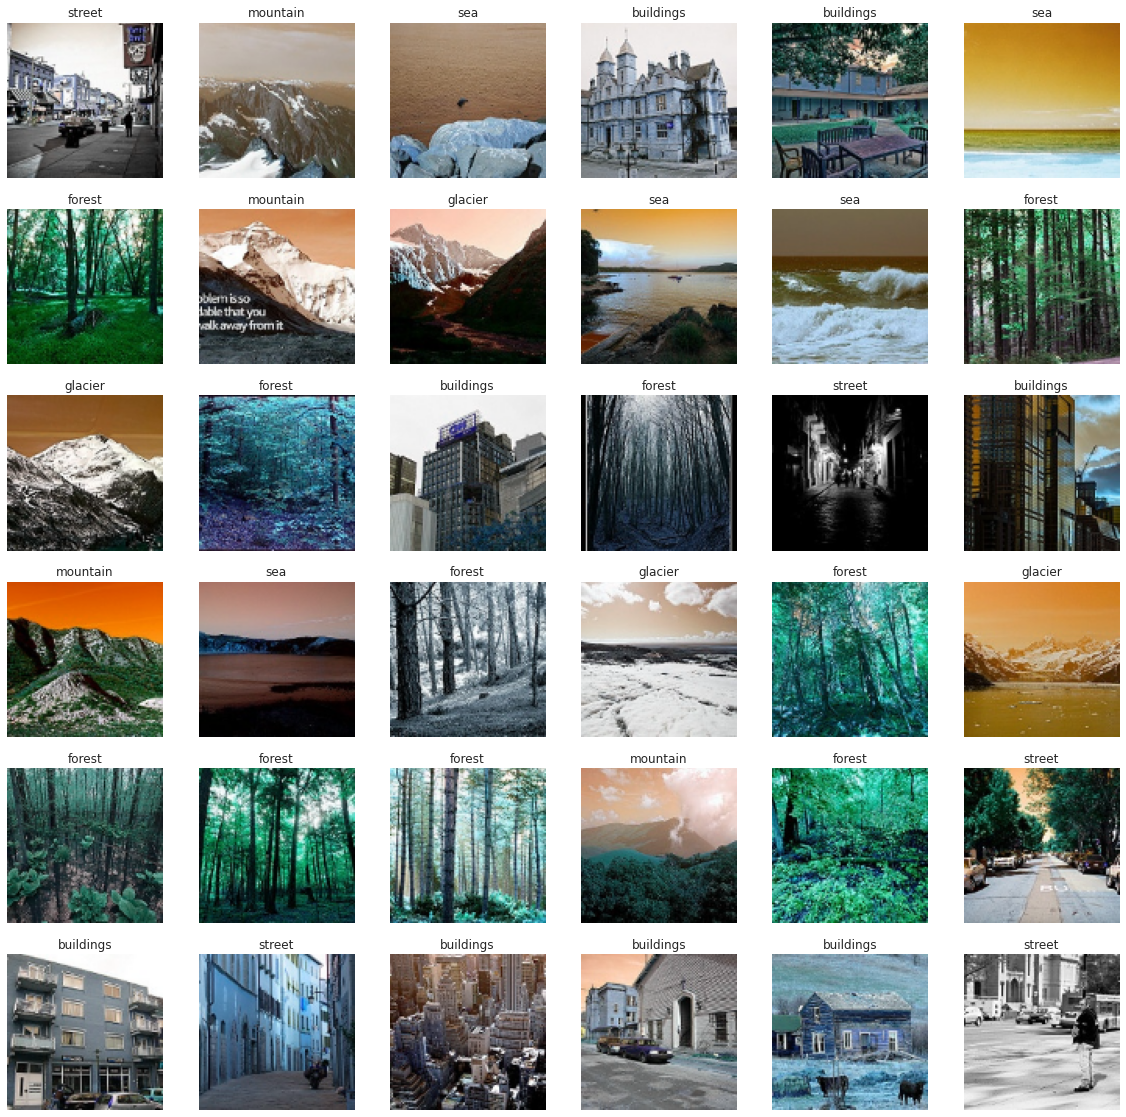

In [25]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [26]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [27]:
print(f'we have {len(X_test)} items in X_test')


we have 3000 items in X_test


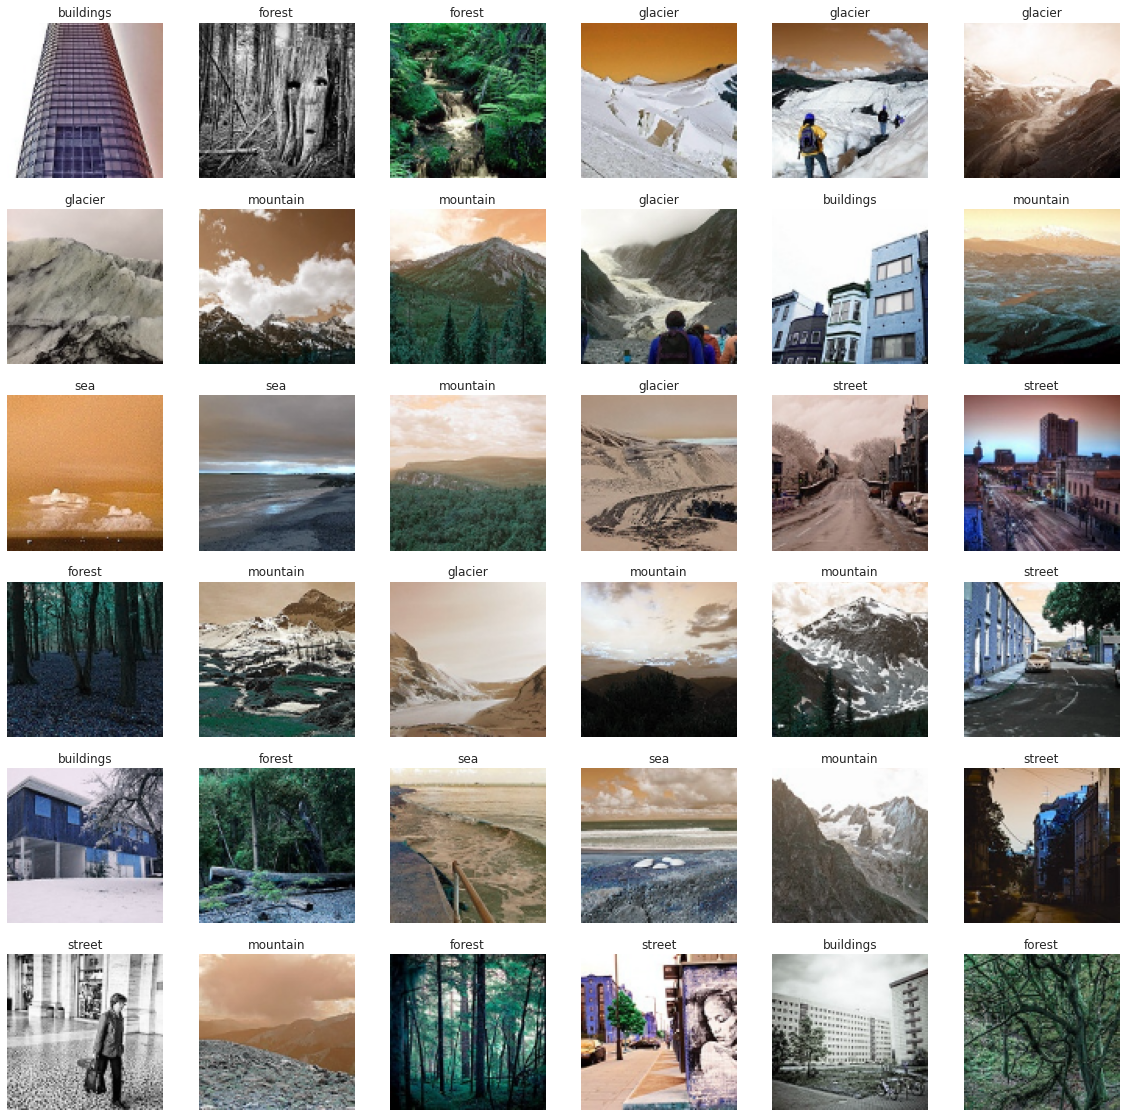

In [28]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [35]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))

error: ignored

In [34]:
print(f'we have {len(X_pred)} items in X_pred')

we have 3468 items in X_pred


In [31]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

ValueError: ignored

<Figure size 1440x1440 with 0 Axes>